# Análisis exploratorio de datos (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from IPython.display import display
import matplotlib.colors as mcolors
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


<Figure size 2160x1440 with 0 Axes>

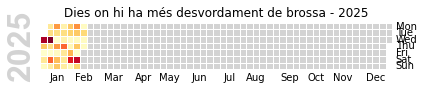

<Figure size 2160x1440 with 0 Axes>

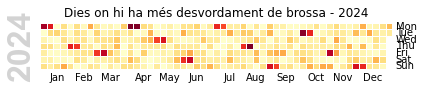

In [2]:
# Cargamos el dataset
df = pd.read_csv('assets/datasets/activity_january_2025.csv', parse_dates=['date'], index_col='date')

plt.figure(figsize=(30, 20))

# Crear el calendario de calor
calmap.calendarplot(df['activity'], how='sum', cmap='YlOrRd', fillcolor='lightgrey', linewidth=0.5)
plt.title('Dies on hi ha més desvordament de brossa - 2025')
plt.show()

df_2 = pd.read_csv('assets/datasets/activity_2024.csv', parse_dates=['date'], index_col='date')

plt.figure(figsize=(30, 20))
calmap.calendarplot(df_2['activity'], how='sum', cmap='YlOrRd', fillcolor='lightgrey', linewidth=0.5)
plt.title('Dies on hi ha més desvordament de brossa - 2024')
plt.show()

In [3]:

# Cargar el CSV, asumiendo que tiene un encabezado correcto.
df = pd.read_csv('assets/datasets/containers.csv', header=0)

# Eliminar espacios en los nombres de columnas (por si acaso)
df.columns = df.columns.str.strip()

# Convertir las columnas de latitud y longitud a float (asegurándonos de que no tengan valores no numéricos)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Eliminar filas con valores NaN en latitud o longitud
df = df.dropna(subset=['latitude', 'longitude'])

# Filtrar solo los contenedores con prioridad "high"
df_high = df[df['priority'].str.strip().str.lower() == 'high']

# Calcular el centro del mapa a partir de las coordenadas medias de los contenedores "high"
center_lat = df_high['latitude'].mean()
center_lon = df_high['longitude'].mean()

# Crear el mapa base centrado
m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

# Preparar los datos para el HeatMap (lista de [lat, lon])
heat_data = [[row['latitude'], row['longitude']] for index, row in df_high.iterrows()]

# Añadir la capa HeatMap al mapa
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('heatmap_high_priority.html')

m

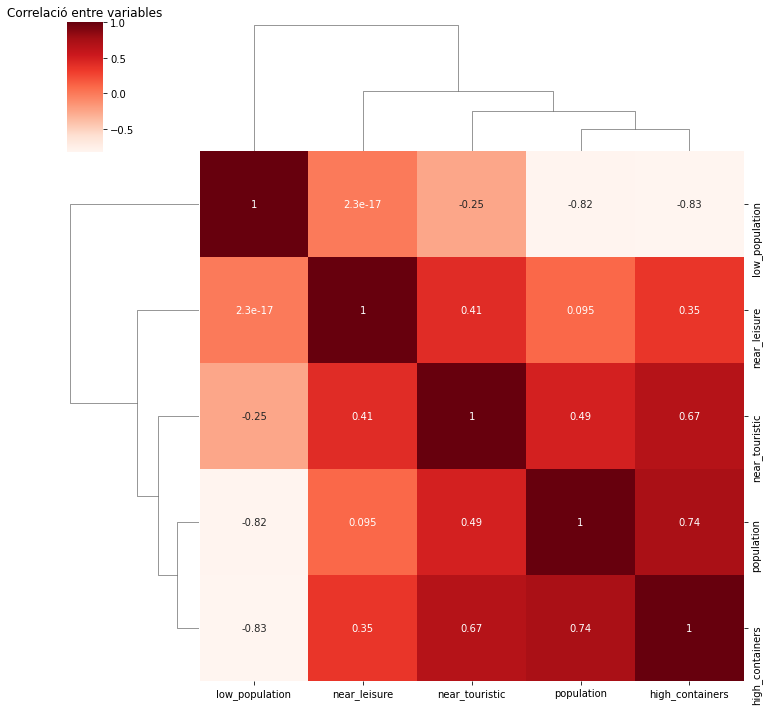

In [4]:
# Se asume que el CSV tiene las columnas: zone, population, high_containers, near_leisure, near_touristic, low_population
df = pd.read_csv('assets/datasets/cluster_data.csv')

# Limpieza: quitar espacios en blanco en nombres de columnas
df.columns = df.columns.str.strip()

# Convertir variables categóricas a numéricas: Yes -> 1, No -> 0
for col in ['near_leisure', 'near_touristic', 'low_population']:
    df[col] = df[col].str.strip().map({'Yes': 1, 'No': 0})

# Seleccionar las variables numéricas a analizar
cols = ['population', 'high_containers', 'near_leisure', 'near_touristic', 'low_population']
corr = df[cols].corr()

# Crear el clustermap de la matriz de correlación
sns.clustermap(corr, annot=True, cmap='Reds')
plt.title('Correlació entre variables')
plt.show()

  day_of_week  hour
0      Monday   8.0
1      Monday   8.5
2      Monday   9.0
3      Monday   9.0
4      Monday   9.5


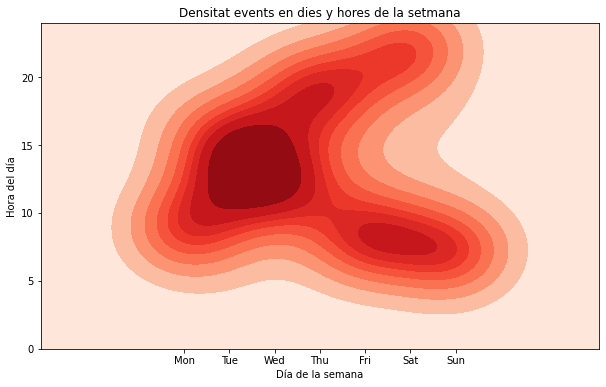

In [5]:
# Leer el dataset
df = pd.read_csv('assets/datasets/high_events.csv', comment='#')  # el parámetro comment para ignorar líneas de comentario

# Mostrar las primeras filas para confirmar
print(df.head())

# Mapear los días de la semana a números (Monday=0, ..., Sunday=6)
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['day_num'] = df['day_of_week'].map(day_mapping)

# Creamos el KDE plot usando seaborn
plt.figure(figsize=(10, 6))
# Usamos kdeplot para estimar la densidad bidimensional: x = día (numérico), y = hora
sns.kdeplot(
    data=df, 
    x='day_num', 
    y='hour', 
    cmap="Reds", 
    fill=True, 
    thresh=0, 
    levels=10
)

plt.xticks(ticks=np.arange(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Día de la semana')
plt.ylabel('Hora del día')
plt.title('Densitat events en dies y hores de la setmana')

plt.ylim(0, 24)
plt.show()
